In [1]:
# Import Packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, learning_curve, cross_val_score
from sklearn.preprocessing import  MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import make_pipeline

from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Read in cleaned and encoded data from EDA
df = pd.read_csv('../data/Cleaned_And_Encoded_Churn_Data_For_Modeling.csv')
df.head()

,Satisfaction Score,Churn Value,Churn Score,CLTV,Employee Related Cancellation,Product/Service Related Cancellation,Competitor Cancellation,Price Cancellation,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,City,Zip Code,Churn Category_Competitor,Churn Category_Did Not Churn,Churn Category_Dissatisfaction,Churn Category_Other,Churn Category_Price,Churn Reason_Attitude of support person,Churn Reason_Competitor had better devices,Churn Reason_Competitor made better offer,Churn Reason_Competitor offered higher download speeds,Churn Reason_Competitor offered more data,Churn Reason_Deceased,Churn Reason_Did Not Churn,Churn Reason_Don't know,Churn Reason_Extra data charges,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Referred a Friend_Yes,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Offer_Unknown/None,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Online Security_Yes,Online Backup_Yes,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Male,Under 30_Yes,Senior Citizen_Yes,Married_Yes,Dependents_Yes
0,3,1,91,5433,0,0,1,0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,78,0,293,90022,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
1,3,1,69,5302,0,0,1,0,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,74,1,293,90063,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1
2,2,1,81,3179,0,0,1,0,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,71,3,293,90065,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,1,0,1
3,2,1,88,5337,0,1,0,0,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,78,1,25,90303,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,1
4,2,1,67,2793,0,0,0,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,80,1,30,90602,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1


In [3]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 77 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Satisfaction Score                                      7043 non-null   int64  
 1   Churn Value                                             7043 non-null   int64  
 2   Churn Score                                             7043 non-null   int64  
 3   CLTV                                                    7043 non-null   int64  
 4   Employee Related Cancellation                           7043 non-null   int64  
 5   Product/Service Related Cancellation                    7043 non-null   int64  
 6   Competitor Cancellation                                 7043 non-null   int64  
 7   Price Cancellation                                      7043 non-null   int64  
 8   Number of Referrals                   

In [5]:
# Remove features that are causing multicolinearity issues
df.drop(columns=['Employee Related Cancellation', 'Product/Service Related Cancellation', 'Competitor Cancellation',
                 'Price Cancellation', 'Churn Category_Did Not Churn', 'Churn Reason_Did Not Churn',
                 'Internet Type_None'], inplace=True)

## As shown, I have already created dummy features in the EDA step. There are no null values so we are ready to scale and normalize our data


## Our target variable is 'Churn Value'

In [6]:
#Split data into Features and target variable 'Churn Value'
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

In [7]:
#Split data into Train & Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7, stratify=y)

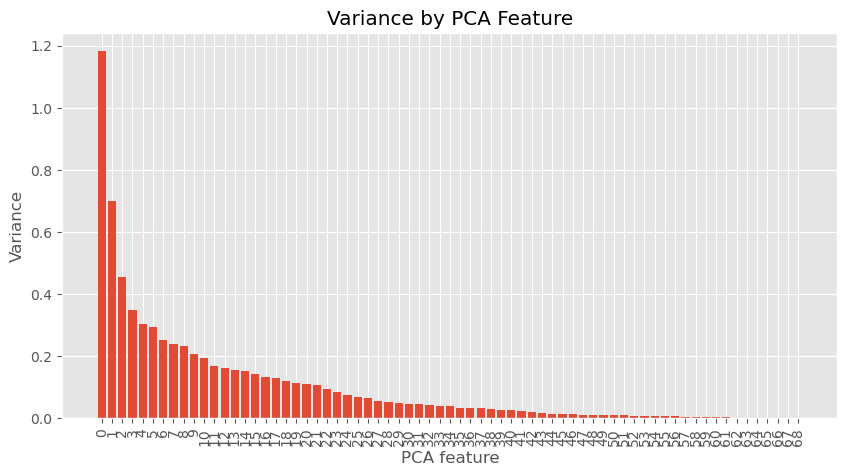

In [8]:
# Create scaler: scaler
scaler = MinMaxScaler()

# Create a PCA instance: pca
pca = PCA(random_state=7)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to the training data
pipeline.fit(X_train)

# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=(10,5))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.title('Variance by PCA Feature')
plt.xticks(features, rotation=90)
plt.show()

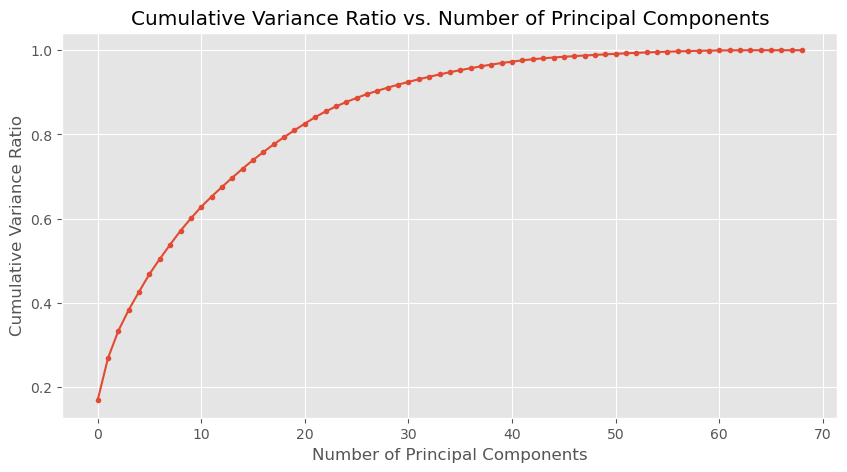

In [9]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance ratio
plt.figure(figsize=(10,5))
plt.plot(cumulative_variance_ratio, marker='.', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show();

In [10]:
# Create scaler: scaler
scaler = MinMaxScaler()

# Create a PCA instance: pca
pca = PCA(n_components=21, random_state=7)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to the training data
pipeline.fit(X_train)

# Transform the training and test data
X_train_pipe = pipeline.transform(X_train)
X_test_pipe = pipeline.transform(X_test)

In [11]:
# Undersample from majority as our classes are imbalanced
from imblearn.under_sampling import RandomUnderSampler

# Define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=7)

# Fit and apply the undersampling strategy to the training data
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train_pipe, y_train)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1035
           1       0.89      0.94      0.92       374

    accuracy                           0.96      1409
   macro avg       0.94      0.95      0.94      1409
weighted avg       0.96      0.96      0.96      1409

Logistic Regression
accuracy:  0.9552874378992193
precision:  0.8936708860759494
recall:  0.9438502673796791
f1_score:  0.955668820193373


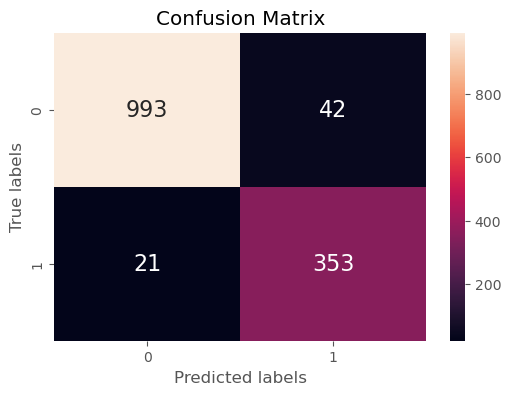

In [12]:
#Defining the modeling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_pipe)

    #Performance evaluation
    def print_scores(alg, y_test, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_test, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_test, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_test, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_test, y_pred, average='weighted')
        print("f1_score: ",f_score)

    report = classification_report(y_test, y_pred)
    print(report)
    
    print_scores(alg, y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 16})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    return model

# Running logistic regression model
log_reg_model = modeling(LogisticRegression, 'Logistic Regression', params={'random_state':7})

In [13]:
from sklearn.model_selection import cross_val_score

# Define a function to perform cross-validation
def cross_validate_model(model, X, y, cv=10):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

    # Print cross-validation scores
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())
    print("Standard deviation of CV accuracy:", cv_scores.std())

# Call the cross-validation function
cross_validate_model(log_reg_model, X_train_resampled, y_train_resampled)

Cross-validation scores: [0.97993311 0.95986622 0.95652174 0.95652174 0.95317726 0.94983278
 0.95317726 0.95652174 0.95986622 0.93311037]
Mean CV accuracy: 0.9558528428093644
Standard deviation of CV accuracy: 0.01086827880218857


In [14]:
# Save processed df just before we split into features and target variable as csv for use in our modeling notebook
df.to_csv('../data/pre_processed_churn_df_ready_for_modeling', index=False)

## Our data is now ready to test with different models. We pre-encoded our categorical variables in the last notebook and here we finished our pre-processing by:
1) Splitting the data into our features and target variable
2) Train / Test split our data
3) Built a pipeline running MinMax scaler and PCA, ultimately reducing the components from 70 to 21
4) Fit pipeline on X_train, transformed X_train and X_test
5) Undersampled the transformed X_train and (untransformed) y_train from the majority to handle class imbalance
6) Defined a modeling function to streamline the modeling processs
7) Tested the modeling function with a Logistic Regression Model
8) Checked accuracy, precision, recall, f1 and looked at the confusion matrix
9) Cross validated results to confirm we are not overfitting our data

## In the next step we will read in the pre-processed df we just saved, run cells 6 & 7 above, as well as cells 10-13 to begin testing different models and tuning hyperparameters